In [30]:
import numpy as np
import matplotlib.pyplot as plt
import os

## Izbriši podatke v mapi `RESULTS`

In [31]:
# # Izbriši podatke v mapi `RESULTS`
os.system("rmdir /s /q RESULTS")
os.system("mkdir RESULTS")

for T in [0.01,0.1,0.5,0.8,1.0,2.0]:
    print(f"Poteka simulacija za T = {T}")
    os.system(f"run.exe {T}")


Poteka simulacija za T=0.01
Poteka simulacija za T=0.1
Poteka simulacija za T=0.5
Poteka simulacija za T=0.8
Poteka simulacija za T=1.0
Poteka simulacija za T=2.0


In [36]:
files = os.listdir('RESULTS')
r_min = []
lege = []
T = []
for file in files:
    info = file.split("_")
    if file.endswith('.txt'):
        data = np.loadtxt('RESULTS/'+file)
        if "min_dist" in file:
            r_min.append(file)
        if "pozicije" in file:
            lege.append(file)
        if "temperatura" in file:
            T.append(file)

print(r_min)
print(lege)
print(T)

['0dp01_T_min_dist.txt', '0dp1_T_min_dist.txt', '0dp5_T_min_dist.txt', '0dp8_T_min_dist.txt', '1_T_min_dist.txt', '2_T_min_dist.txt']
['0dp01_T_pozicije.txt', '0dp1_T_pozicije.txt', '0dp5_T_pozicije.txt', '0dp8_T_pozicije.txt', '1_T_pozicije.txt', '2_T_pozicije.txt']
['0dp01_T_temperatura.txt', '0dp1_T_temperatura.txt', '0dp5_T_temperatura.txt', '0dp8_T_temperatura.txt', '1_T_temperatura.txt', '2_T_temperatura.txt']


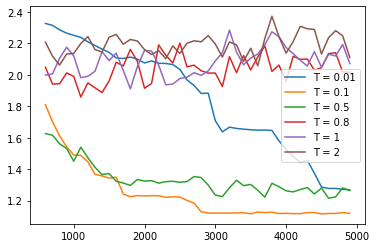

In [37]:
for file in r_min:
    label = "T = " + file.split("_")[0].replace("dp",".")
    data = np.loadtxt('RESULTS/'+file)
    plt.plot(data[:,0],data[:,1],label=label)
plt.legend()
plt.show()

# Temperatura

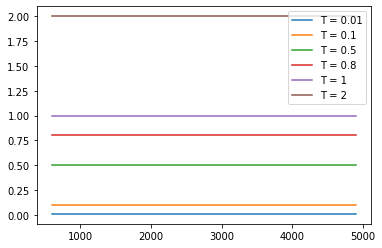

In [38]:
for file in T:
    label = "T = " + file.split("_")[0].replace("dp",".")
    data = np.loadtxt('RESULTS/'+file)
    plt.plot(data[:,0],data[:,1],label=label)
plt.legend()
plt.show()

# Prikaz system

C:\Users\Rene\AppData\Local\Temp\ipykernel_47836\70097478.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
C:\Users\Rene\AppData\Local\Temp\ipykernel_47836\70097478.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


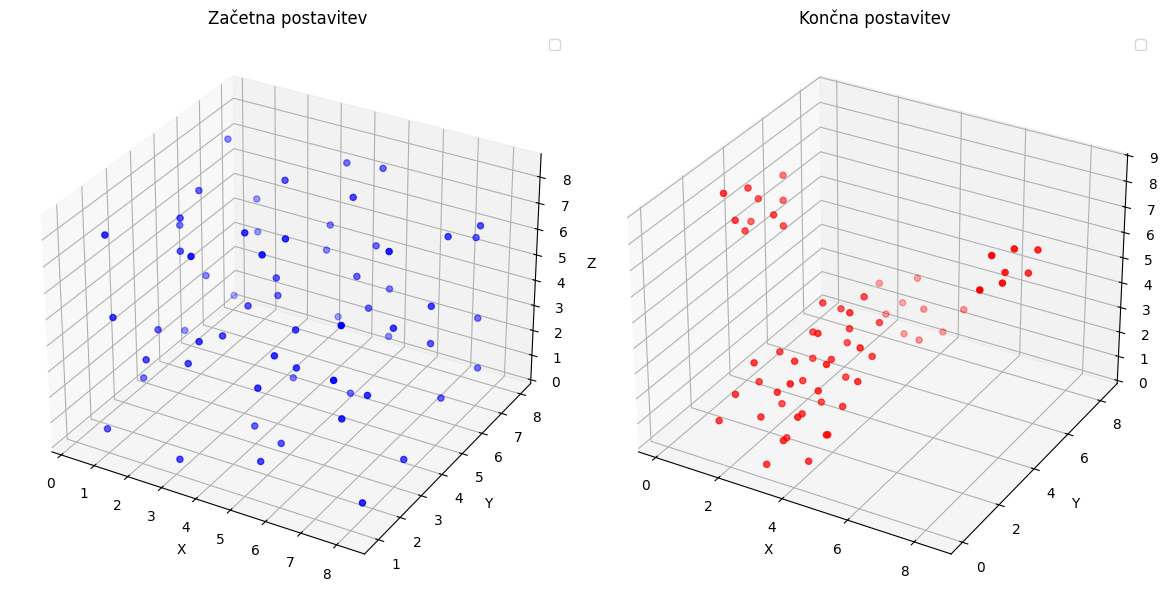

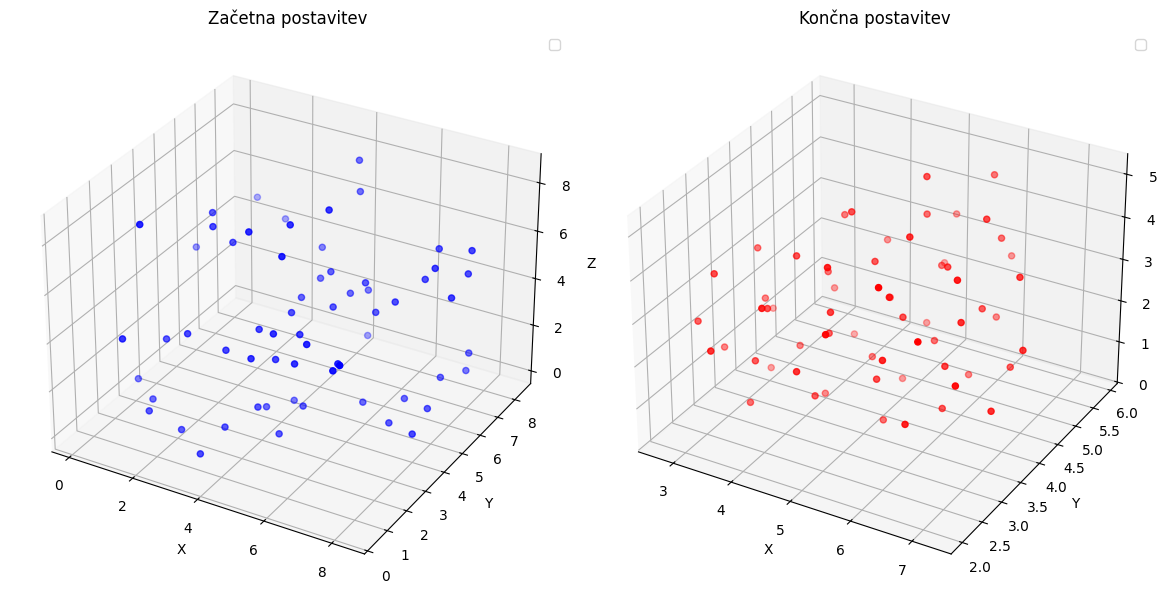

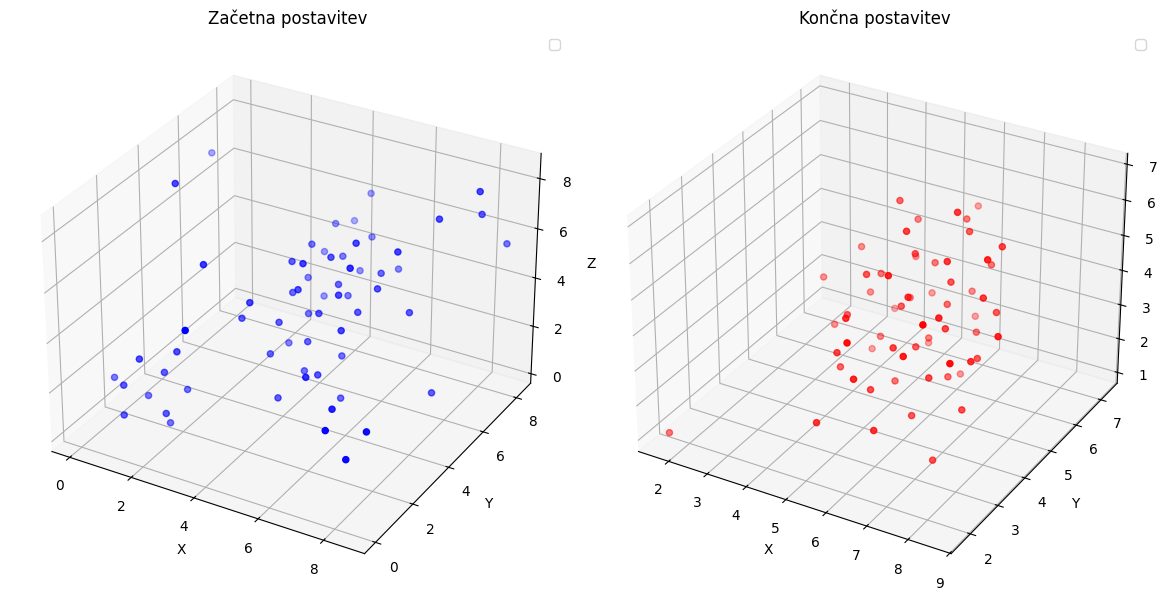

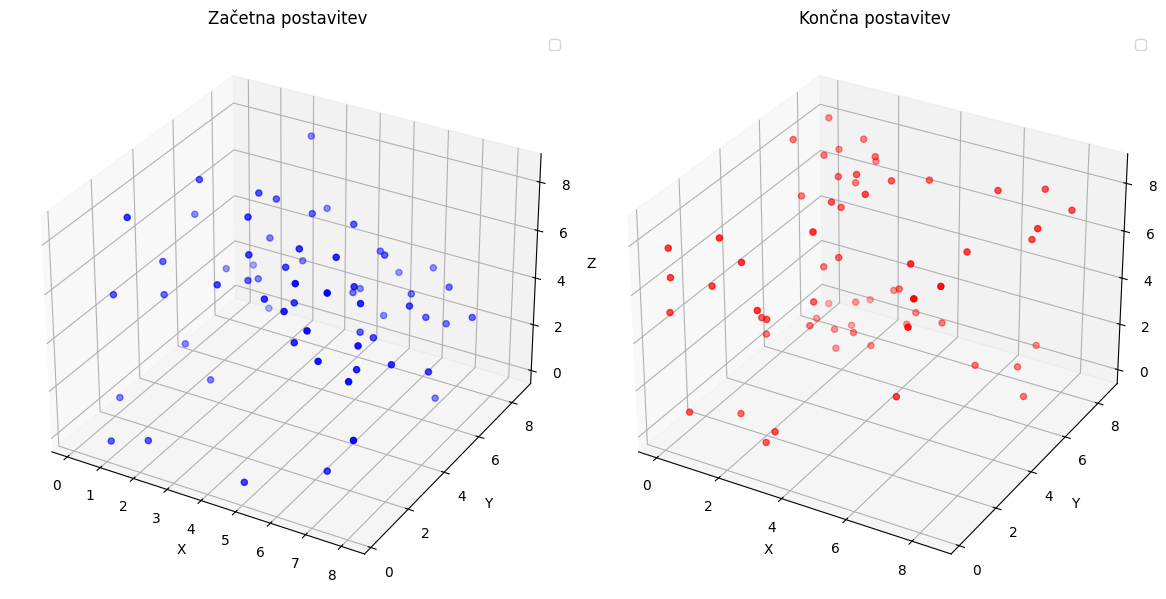

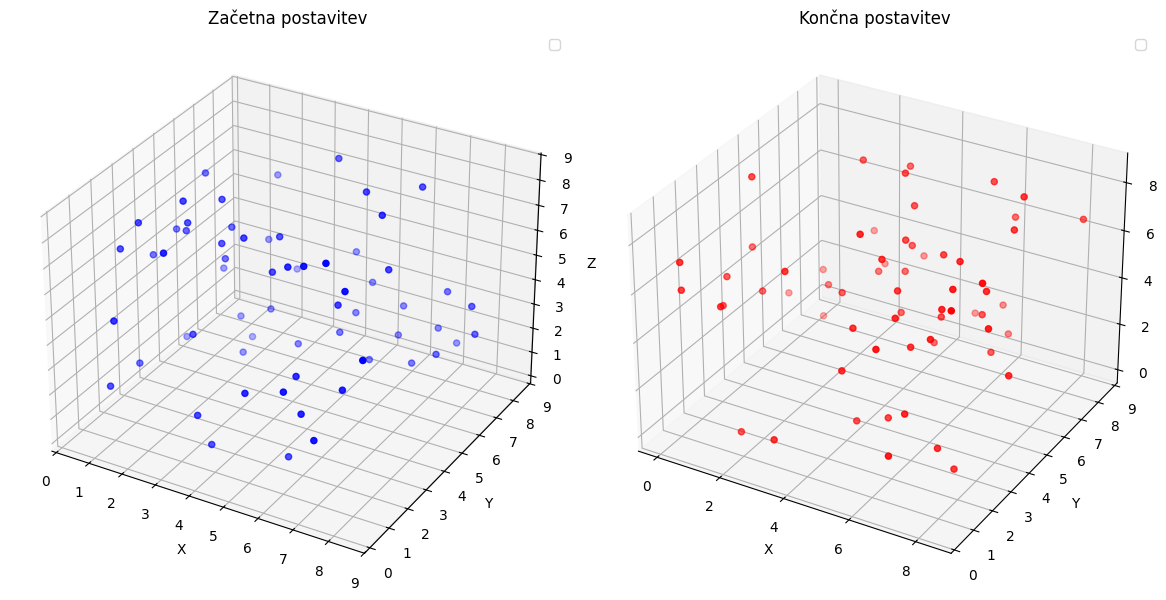

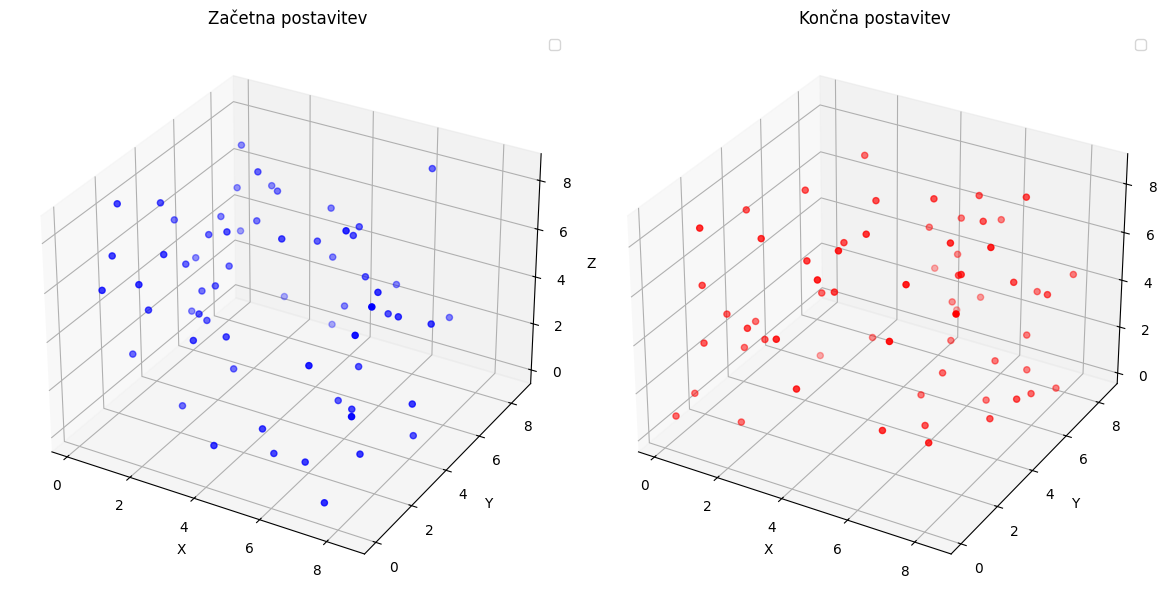

In [39]:
# 3D projekcija system
from mpl_toolkits.mplot3d import Axes3D

for file in lege:
    data = np.loadtxt('RESULTS/' + file)
    
    # Use isclose for robust time matching (optional)
    t_min = data[:, 0].min()
    t_max = data[:, 0].max()
    
    select_init = np.where(np.isclose(data[:, 0], t_min))[0]
    init_pos = data[select_init, 1:]
    
    select_final = np.where(np.isclose(data[:, 0], t_max))[0]
    final_pos = data[select_final, 1:]
    
    fig = plt.figure(figsize = (12,6),dpi = 99)

    # Create a 1x2 grid of subplots and get each axis for 3D plotting
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')

    # Plot the initial positions on the first subplot
    ax1.scatter(init_pos[:, 0], init_pos[:, 1], init_pos[:, 2], color='b')
    ax1.set_title("Začetna postavitev")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_zlabel("Z")
    ax1.legend()

    # Plot the final positions on the second subplot
    ax2.scatter(final_pos[:, 0], final_pos[:, 1], final_pos[:, 2], color='r')
    ax2.set_title("Končna postavitev")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_zlabel("Z")
    ax2.legend()

    plt.tight_layout()
    plt.show()